# Analysis01

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


from subprocess import check_output
df = pd.read_csv('rainfall in india 1901-2015.csv')
df.info()
df.dropna(how='any', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
SUBDIVISION    4116 non-null object
YEAR           4116 non-null int64
JAN            4112 non-null float64
FEB            4113 non-null float64
MAR            4110 non-null float64
APR            4112 non-null float64
MAY            4113 non-null float64
JUN            4111 non-null float64
JUL            4109 non-null float64
AUG            4112 non-null float64
SEP            4110 non-null float64
OCT            4109 non-null float64
NOV            4105 non-null float64
DEC            4106 non-null float64
ANNUAL         4090 non-null float64
Jan-Feb        4110 non-null float64
Mar-May        4107 non-null float64
Jun-Sep        4106 non-null float64
Oct-Dec        4103 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 611.0+ KB


In [5]:
subdivs = df['SUBDIVISION'].unique()
num_of_subdivs = subdivs.size
print('Total # of Subdivs: ' + str(num_of_subdivs))
subdivs

Total # of Subdivs: 36


array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

SUBDIVISION
ARUNACHAL PRADESH    3418.857143
COASTAL KARNATAKA    3408.409649
KONKAN & GOA         2977.686087
Name: ANNUAL, dtype: float64
SUBDIVISION
HARYANA DELHI & CHANDIGARH    530.496522
SAURASHTRA & KUTCH            495.161739
WEST RAJASTHAN                292.673043
Name: ANNUAL, dtype: float64


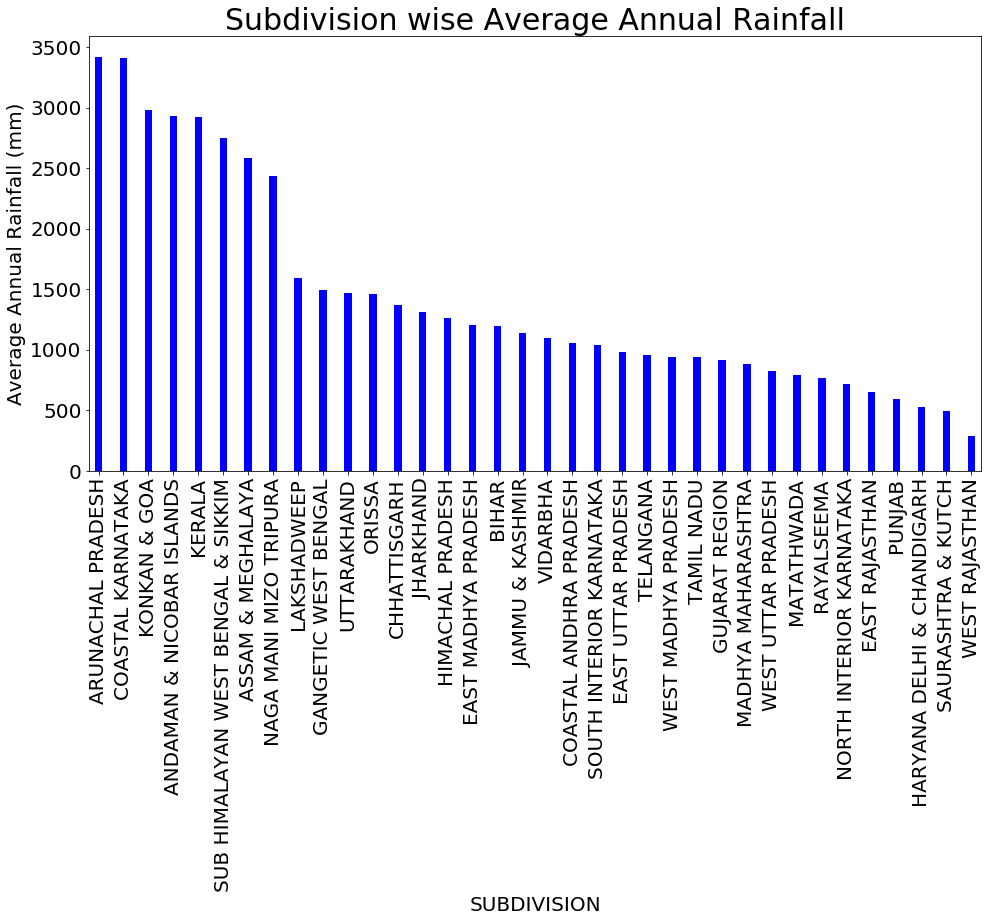

In [11]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
df.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'].plot('bar', color='b',width=0.3,title='Subdivision wise Average Annual Rainfall', fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Average Annual Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print(df.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'][[0,1,2]])
print(df.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'][[33,34,35]])

Max: 61815.600000000006 ocurred in [1961]
Max: 41273.6 ocurred in [1972]
Mean: 50182.83826086957


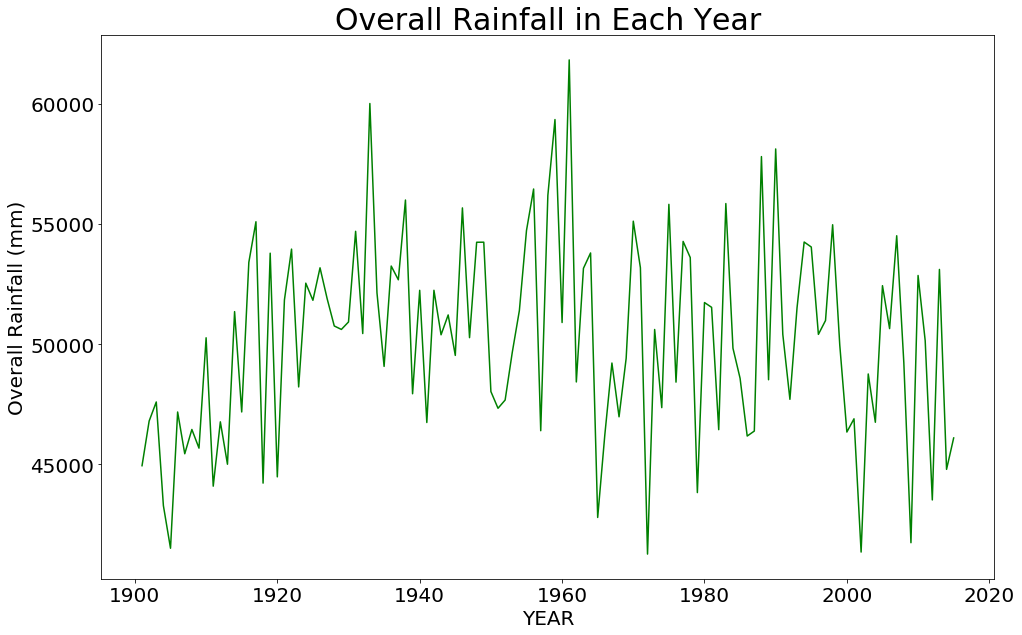

In [7]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = df.groupby('YEAR').sum()['ANNUAL']
dfg.plot('line', title='Overall Rainfall in Each Year', color = 'g',fontsize=20)
#df.groupby('YEAR').sum()['ANNUAL'].plot()
#plt.xlim(0, 115)
#plt.xticks(np.linspace(0,115,24,endpoint=True),np.linspace(1900,2015,24,endpoint=True).astype(int))
#plt.xticks(np.linspace(1901,2015,24,endpoint=True))
#plt.xticks(rotation = 90)
plt.ylabel('Overall Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

Max: 348.56750468137267 ocurred in ['JUL']
Max: 19.11137059083043 ocurred in ['JAN']
Mean: 118.95843815772808


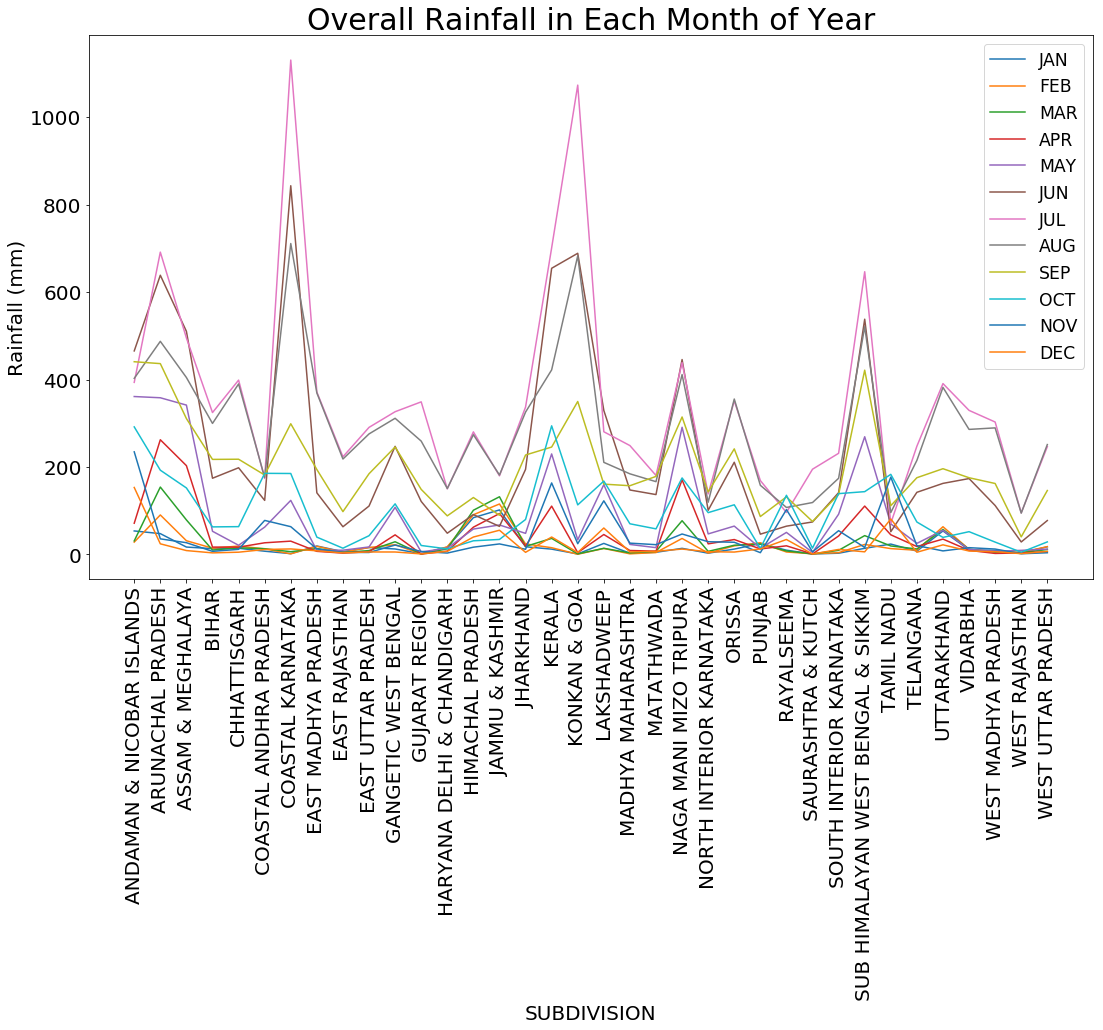

In [8]:
months = df.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
xlbls = df['SUBDIVISION'].unique()
xlbls.sort()
dfg = df.groupby('SUBDIVISION').mean()[months]
dfg.plot.line(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'xx-large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

dfg = dfg.mean(axis=0)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

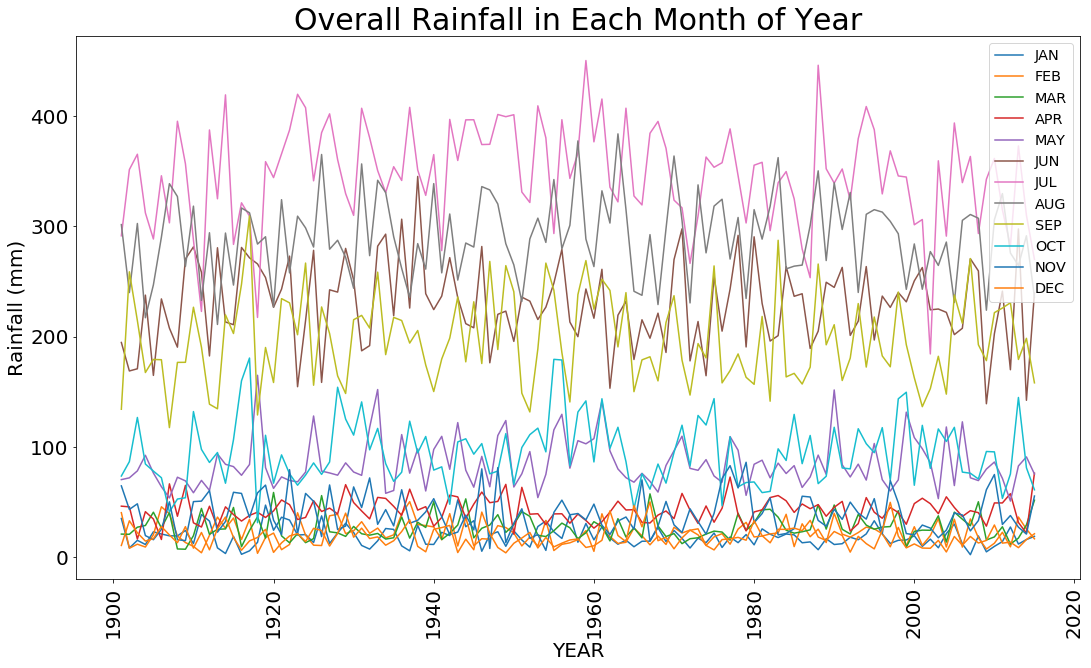

In [9]:
months = df.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df.groupby('YEAR').mean()[months].plot.line(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
#plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'x-large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

# Linear Regression

MAD (Training Data): 93.79140703822411
MAD (Test Data): 93.2776765163552


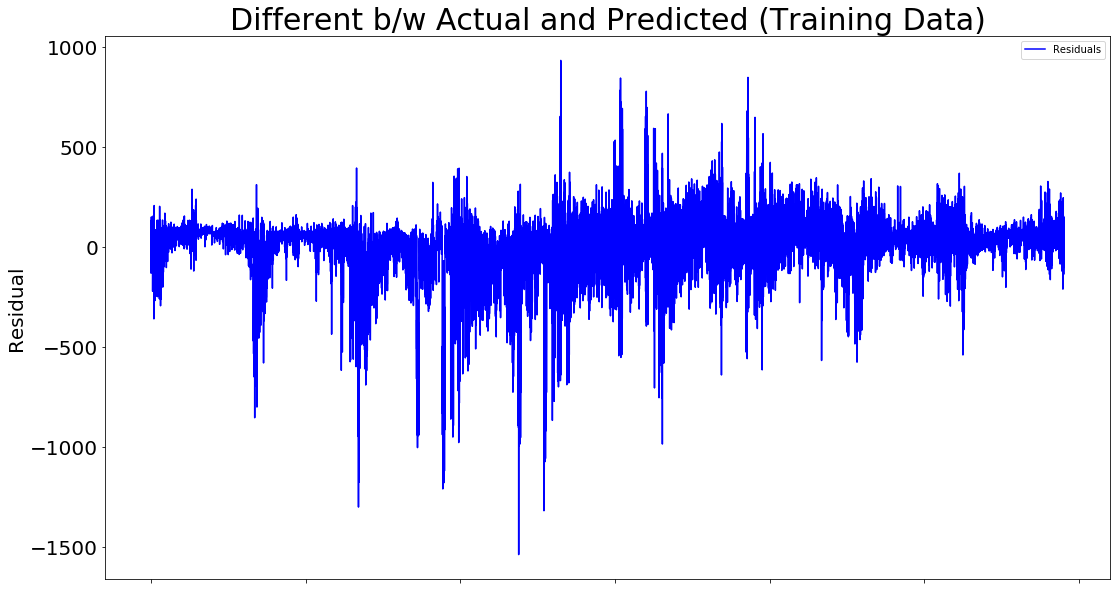

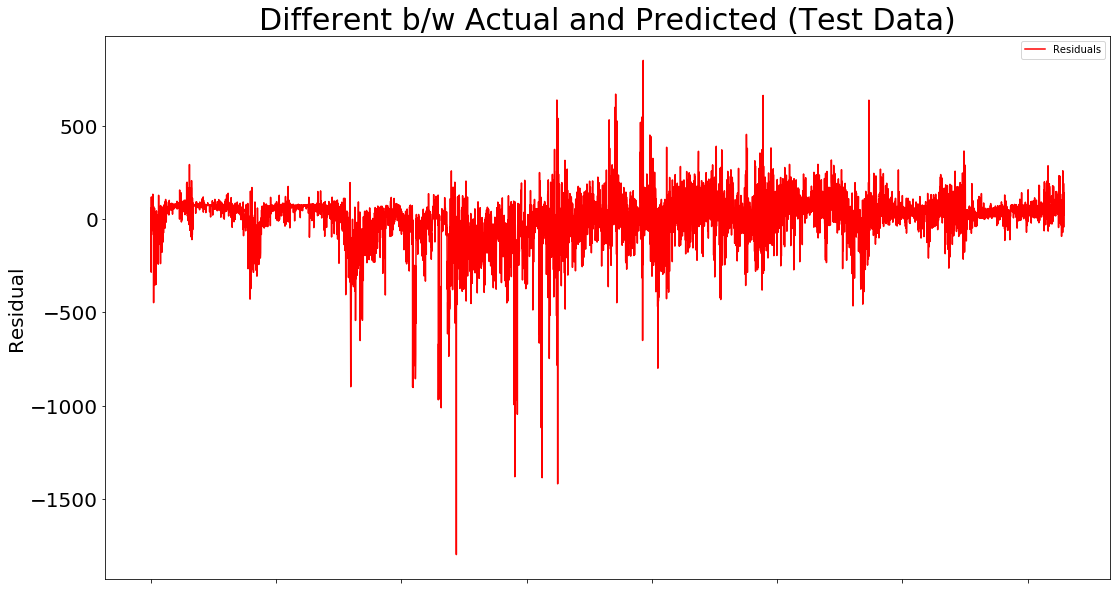

In [13]:
df2 = df[['SUBDIVISION',months[0],months[1],months[2],months[3]]]
#df2 = df['YEAR','JAN','FEB','MAR','APR']
df2.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])

for k in range(1,9):
    df3 = df[['SUBDIVISION',months[k],months[k+1],months[k+2],months[k+3]]]
    df3.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])
    df2 = df2.append(df3)
df2.index = range(df2.shape[0])
    
#df2 = pd.concat([df2, pd.get_dummies(df2['SUBDIVISION'])], axis=1)

df2.drop('SUBDIVISION', axis=1,inplace=True)
#print(df2.info())
msk = np.random.rand(len(df2)) < 0.8

df_train = df2[msk]
df_test = df2[~msk]
df_train.index = range(df_train.shape[0])
df_test.index = range(df_test.shape[0])

reg = linear_model.LinearRegression()
reg.fit(df_train.drop('x4',axis=1),df_train['x4'])
predicted_values = reg.predict(df_train.drop('x4',axis=1))
residuals = predicted_values-df_train['x4'].values
print('MAD (Training Data): ' + str(np.mean(np.abs(residuals))))
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted (Training Data)', color = 'b', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)


predicted_values = reg.predict(df_test.drop('x4',axis=1))
residuals = predicted_values-df_test['x4'].values
print('MAD (Test Data): ' + str(np.mean(np.abs(residuals))))
df_res = pd.DataFrame(residuals)
df_res.columns = ['Residuals']

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res.plot.line(title='Different b/w Actual and Predicted (Test Data)', color='r', ax=ax,fontsize=20)
ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)